In [116]:
import pandas as pd
import numpy as np

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [118]:
netflix = pd.read_csv('netflix_titles.csv')

In [119]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [120]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [121]:
netflix.shape

(6234, 12)

In [122]:
#Checking datatypes
netflix.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [123]:
#Checking number of unique values in each column
netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [124]:
#checking different categories in rating 
netflix['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

TV-Y: This program is designed to be appropriate for all children.
TV-Y7: This program is designed for children age 7 and above.
TV-G: This program is suitable for all ages.
TV-PG: This program contains material that parents may find unsuitable for younger children (hence, Parental Guidance)
TV-14: This program contains some material that many parents would find unsuitable for children under 14 years of age.
TV-MA: This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
G: This program is suitable for all ages.
NC-17: unsuitable for children under 17.
NR: not rated.
PG: may find unsuitable for younger children. I would say it is the same as TV-PG
PG-13: for children over 13.
R: restricted, only for children over 12.
TV-Y7-FV: Fantasy violence (exclusive to the TV-Y7 rating)
UR: not rated, as in (unrated).

In [125]:
netflix.isnull().values.any()

True

In [126]:
#checking null values 
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

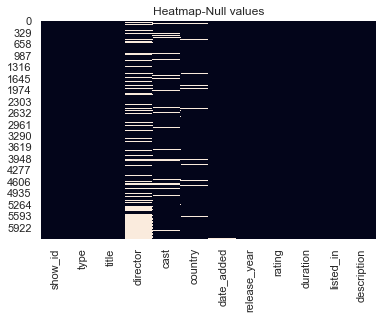

In [127]:
#heatmap of null values
sns.heatmap(netflix.isnull(), cbar=False)
plt.title('Heatmap-Null values')
plt.show()

In [128]:
#replacing null values with arbitary values
netflix['director'].fillna('No_Director', inplace=True)
netflix['cast'].fillna('No_Cast', inplace=True)
netflix['country'].fillna('Country_Unavailable', inplace=True)
netflix.dropna(subset=['date_added','rating'],inplace=True)

Some Exploratory data analysis done on the dataset
1-count of Movies and TV_Shows 2-Total contents, movies and TvShows added in each year 3-Contents added in each month till 2019 4-Popular Genres 5-Countries with most content available 6-Movie rating analysis 7-Tv Shows with largest number of seasons 8-Oldest Worldwide series on Netflix 9-Oldest Canadian series on Netflix 10-Latest Worldwide series on Netflix 11-Latest Canadian series on Netflix

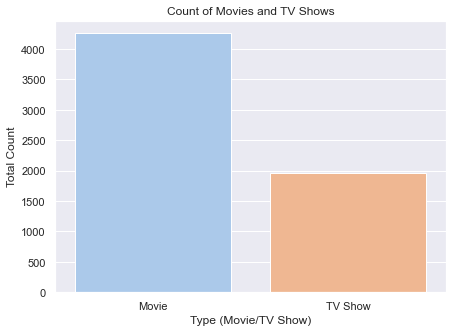

In [129]:
#1--count of Movies and TV_Shows
plt.figure(figsize=(7,5))
g = sns.countplot(netflix.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

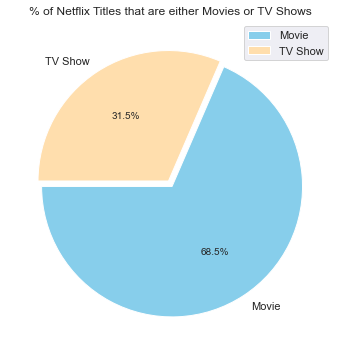

In [130]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix.type.value_counts(), explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

In [131]:
#number of total contents added in each year
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix['month_added'] = pd.DatetimeIndex(netflix['date_added']).month

In [132]:
netflix_year = netflix['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_month = netflix['month_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'month','month_added':'total content count'})
netflix_year

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7
10,2009,2


In [133]:
#movies
netflix_movies = netflix[netflix['type']=='Movie'].copy()
#TV Shows
netflix_tvshows = netflix[netflix['type']=='TV Show'].copy()
netflix_movies['year_added'] = pd.DatetimeIndex(netflix_movies['date_added']).year
netflix_movies['month_added'] = pd.DatetimeIndex(netflix_movies['date_added']).month
netflix_tvshows['year_added'] = pd.DatetimeIndex(netflix_tvshows['date_added']).year
netflix_tvshows['month_added'] = pd.DatetimeIndex(netflix_tvshows['date_added']).month

In [134]:
netflix_year2 = netflix[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

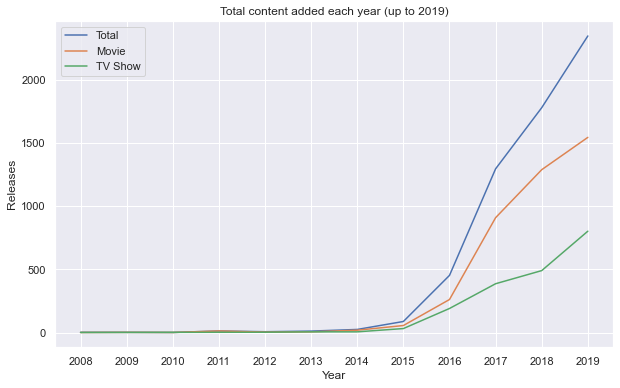

In [135]:
#2 -total_contents, movies, tv_shows added in each year upto 2019
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

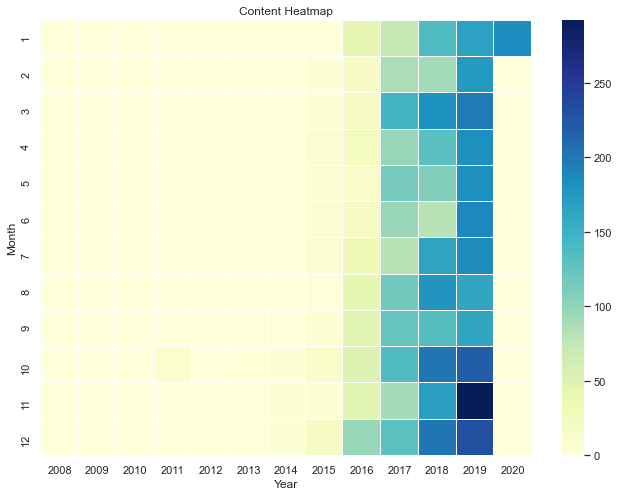

In [136]:
#3-contents added in each month till 2019
year_month = netflix.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
plt.figure(figsize=(11,8))
sns.heatmap(year_month, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

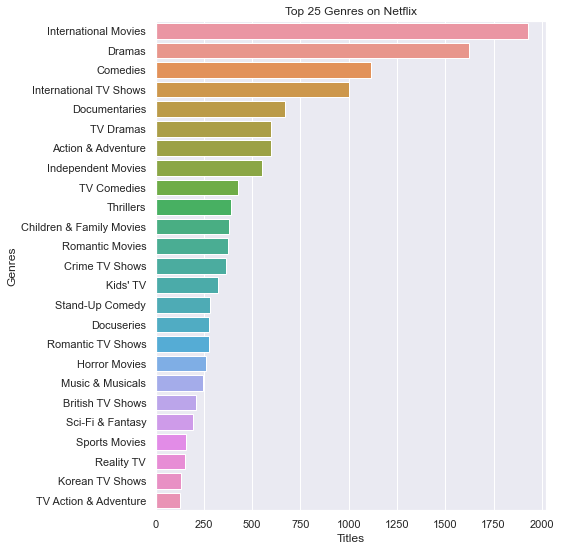

In [137]:
#4-popular Genres
genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(7,9))
g = sns.countplot(y = genres, order=genres.value_counts().index[:25])
plt.title('Top 25 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

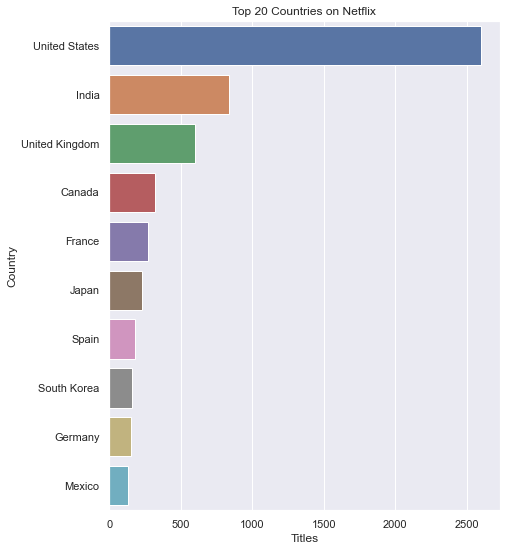

In [138]:
#5-countries with most content available
countries_ = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
countries_ = countries_[countries_ != 'Country_Unavailable']
plt.figure(figsize=(7,9))
g = sns.countplot(y = countries_, order=countries_.value_counts().index[:10])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

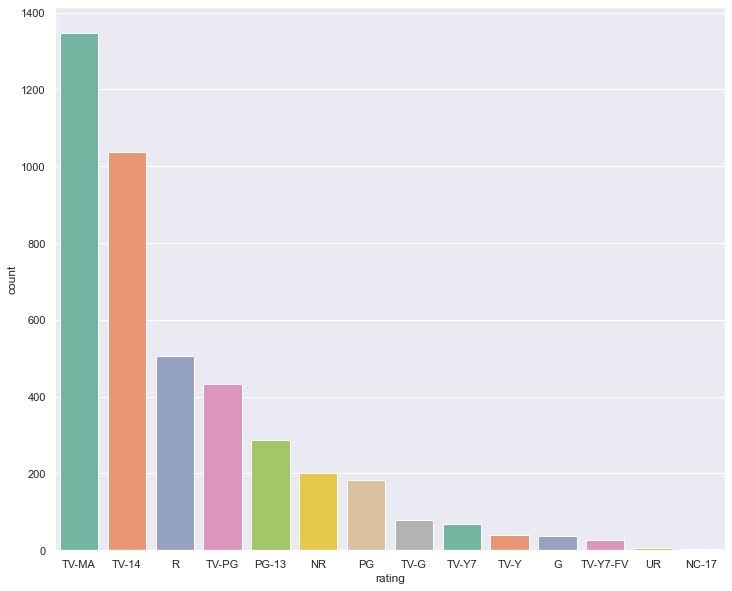

In [139]:
#6-movie rating analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

In [140]:
#7-TV shows with largest number of seasons
features=['title','duration']
durations= netflix_tvshows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')


durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

/Users/neenu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/neenu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/neenu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

<AxesSubplot:xlabel='title'>

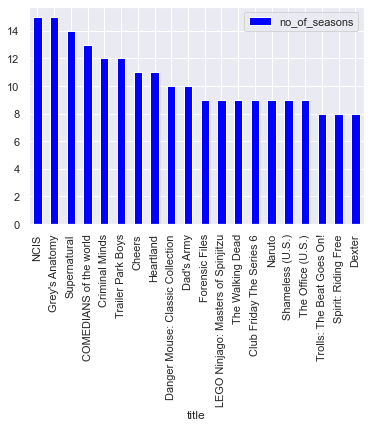

In [141]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

In [142]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

In [143]:
#8--oldest worldwide series on netfix
oldest_series=netflix_tvshows.sort_values(by='release_year')[0:20]

fig1 = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_series['title'],oldest_series['release_year']],fill_color='pink'))
                     ])
fig1.show()

In [144]:
#9--oldest Canadian series on netflix
us_series_data=netflix_tvshows[netflix_tvshows['country']=='Canada']

oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

In [145]:
#10--latest global series on netflix
newest_series=netflix_tvshows.sort_values(by='release_year', ascending=False)[0:50]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_series['title'],newest_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

In [146]:
#11--latest Canadian seies on netflix
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

In [147]:
##Text Pre-processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

[nltk_data] Downloading package stopwords to /Users/neenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are having punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [149]:
# Check to make sure its working
netflix['description'].head(5).apply(text_process)

0    [planning, awesome, wedding, grandfather, pola...
1    [Jandino, Asporaat, riffs, challenges, raising...
2    [help, three, human, allies, Autobots, protect...
3    [prison, ship, crash, unleashes, hundreds, Dec...
4    [nerdy, high, schooler, Dani, finally, attract...
Name: description, dtype: object

Two most common types of recommender systems are Content-Based Filtering and Collaborative Filtering (CF).

Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the "wisdom of the crowd" to recommend items.

Here i will implement a Content based Recommender system on the Netflix dataset.

import CountVectorizer from sklearn

In [150]:
from sklearn.feature_extraction.text import CountVectorizer

import TfidfTransformer from sklearn

In [151]:
from sklearn.feature_extraction.text import  TfidfTransformer

import pipeline from sklearn

In [152]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer()

In [153]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
   ])

In [154]:
tfidf_matrix = pipeline.fit_transform(netflix['description']+ ' '+netflix['title']+ ' ' + netflix['director'] + ' ' + netflix['cast'] + ' ' +netflix['listed_in']+' '+ netflix['description'])

#checking cosine similarity

In [155]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [156]:
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

In [157]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [158]:
get_recommendations('PK')

5054                 3 Idiots
691                     Sanju
2738           Jhansi Ki Rani
1737          Andaz Apna Apna
3623    Merku Thodarchi Malai
2533                 Unbroken
4110         Taare Zameen Par
4572                     ROMA
4925          Rang De Basanti
4489           Dil Chahta Hai
Name: title, dtype: object

In [159]:
get_recommendations('Peaky Blinders')

3845                 The Sound of Your Heart
3998                          We the Animals
4514                                Idiotest
4562                  K-POP Extreme Survival
1212            LEGENDS OF THE HIDDEN TEMPLE
2207            Mystery Science Theater 3000
1332                            Age of Tanks
5111    Once In A Lifetime Sessions with TLC
5759                     Billy on the Street
3573                              The Circle
Name: title, dtype: object